In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_vals = len(unique_vals)
    if nr_vals < 11:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "RowNumber" are 10000
The number of values in features "CustomerId" are 10000
The number of values in features "Surname" are 2932
The number of values in features "CreditScore" are 460
The number of values in features "Geography" are 3; ['France' 'Germany' 'Spain']
The number of values in features "Gender" are 2; ['Female' 'Male']
The number of values in features "Age" are 70
The number of values in features "Tenure" are 11
The number of values in features "Balance" are 6382
The number of values in features "NumOfProducts" are 4; [1 2 3 4]
The number of values in features "HasCrCard" are 2; [0 1]
The number of values in features "IsActiveMember" are 2; [0 1]
The number of values in features "EstimatedSalary" are 9999
The number of values in features "Exited" are 2; [0 1]


## Find out why people are exiting and how long they stayed at the company?

group ages:

- 18-25
- 25 - 35
- 35 - 45
- 45 - 65
- 65 +

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
def age_group(df):
    if df['Age'] <= 25:
        df['Age Group'] = '18-25'
    elif df['Age'] > 25 and df['Age'] <= 35:
        df['Age Group'] = '26-35'
    elif df['Age'] > 35 and df['Age'] <= 45:
        df['Age Group'] = '36-45'
    elif df['Age'] > 45 and df['Age'] <= 65:
        df['Age Group'] = '46-65'
    else:
        df['Age Group'] = '66+'
    return df

In [11]:
df = df.apply(age_group, axis=1)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,36-45
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,26-35
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,36-45
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,36-45


In [12]:
df['Count'] = 0
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Count
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,36-45,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,26-35,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,36-45,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,36-45,0


In [13]:
df['Count'] = df.groupby(["Age Group"]).count()

In [65]:
graph_1 = df[['Age Group', 'IsActiveMember']].value_counts().reset_index(name='counts')
x1 = graph_1.sort_values('Age Group')
x1

,Age Group,IsActiveMember,counts
6,18-25,1,323
7,18-25,0,288
1,26-35,1,1802
3,26-35,0,1740
0,36-45,0,1945
2,36-45,1,1791
4,46-65,1,1003
5,46-65,0,844
8,66+,1,232
9,66+,0,32


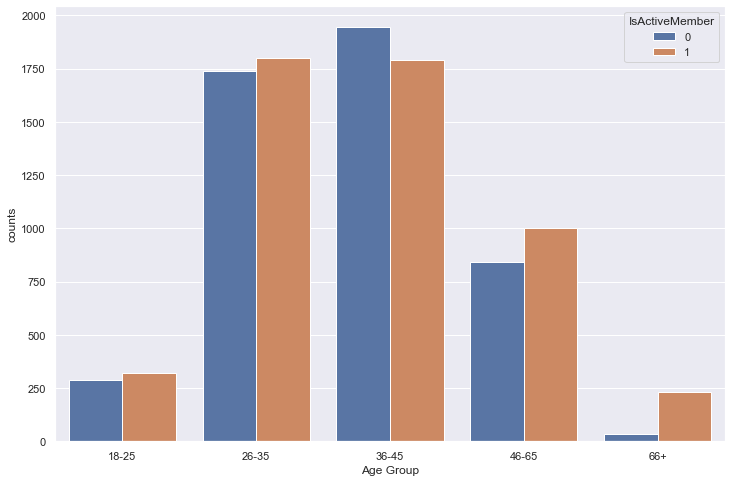

In [15]:
sns.set(rc = {'figure.figsize':(12,8)})
chart1= sns.barplot(x='Age Group', y='counts', data=x1, hue='IsActiveMember')

In [61]:
graph_2 = df[['Age Group', 'Exited']].value_counts().reset_index(name='counts')
x45 = graph_2.sort_values('Age Group')
x45

,Age Group,Exited,counts
5,18-25,0,565
8,18-25,1,46
0,26-35,0,3241
6,26-35,1,301
1,36-45,0,3003
4,36-45,1,733
2,46-65,0,925
3,46-65,1,922
7,66+,0,229
9,66+,1,35


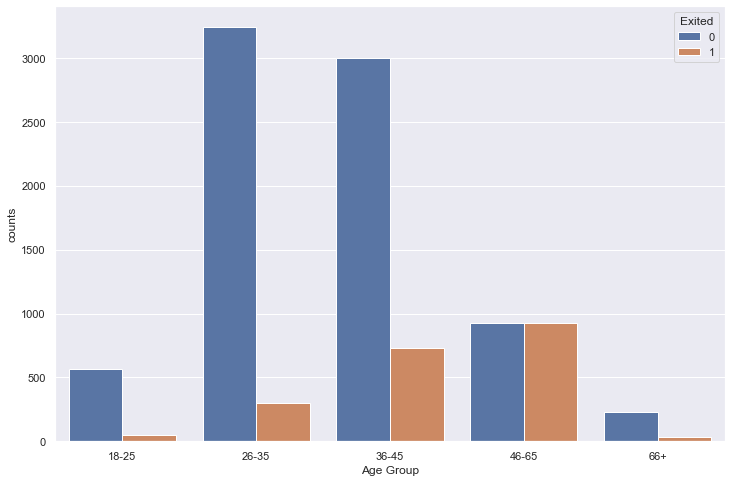

In [62]:
sns.set(rc = {'figure.figsize':(12,8)})
chart1= sns.barplot(x='Age Group', y='counts', data=x45, hue='Exited')

In [63]:
x2 = df.groupby('Age Group').agg({'Tenure': 'mean'}).reset_index()
x2

,Age Group,Tenure
0,18-25,5.188216
1,26-35,5.025692
2,36-45,4.990096
3,46-65,4.964808
4,66+,5.090909


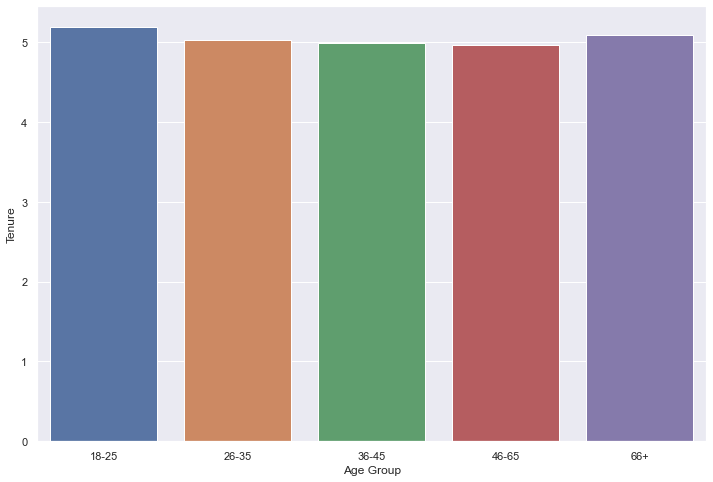

In [17]:
t1 = sns.barplot(x='Age Group', y='Tenure', data=x2)

In [18]:
df[df['Age Group'] == '18-25']

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Count
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,18-25,NaN
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,18-25,NaN
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,18-25,NaN
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0,18-25,NaN
25,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0,18-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,9933,15813451,Fleetwood-Smith,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0,18-25,NaN
9940,9941,15791972,Bergamaschi,748,France,Female,20,7,0.00,2,0,0,10792.42,0,18-25,NaN
9942,9943,15683007,Torode,739,Germany,Female,25,5,113113.12,1,1,0,129181.27,0,18-25,NaN
9943,9944,15659495,Fu,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0,18-25,NaN


In [19]:
x3 = df.groupby('Gender').agg({'Tenure':'mean'}).reset_index()
x3

,Gender,Tenure
0,Female,4.966102
1,Male,5.051677


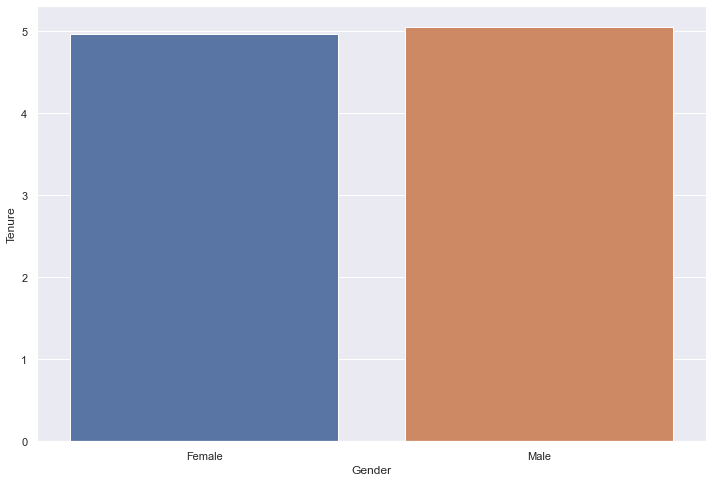

In [20]:
t2 = sns.barplot(x='Gender', y='Tenure', data=x3)

In [21]:
x4 = df.groupby('Geography').agg({'Tenure':'mean'}).reset_index()
x4

,Geography,Tenure
0,France,5.004587
1,Germany,5.009964
2,Spain,5.032297


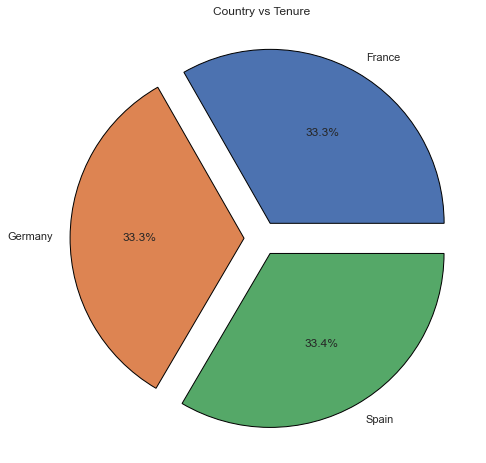

In [22]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(x4['Tenure'], labels=x4['Geography'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Country vs Tenure')
plt.ticklabel_format(style='plain', axis='y')

In [23]:
df[['CreditScore', 'Tenure']]

,CreditScore,Tenure
0,619,2
1,608,1
2,502,8
3,699,1
4,850,2
...,...,...
9995,771,5
9996,516,10
9997,709,7
9998,772,3


In [38]:
df[['CreditScore']].sort_values('CreditScore')

,CreditScore
8762,350
8723,350
1838,350
9624,350
1631,350
...,...
937,850
2980,850
960,850
3109,850


In [39]:
def group_creditscore(df):
    if df['CreditScore'] <= 450:
        df['Grouped credit score'] = '350-450'
    elif df['CreditScore'] > 450 and df['CreditScore'] <= 550:
        df['Grouped credit score'] = '451-550'
    elif df['CreditScore'] > 550 and df['CreditScore'] <= 650:
        df['Grouped credit score'] = '551-650'
    elif df['CreditScore'] > 650:
        df['Grouped credit score'] = '651-850'
    return df

In [40]:
df = df.apply(group_creditscore, axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Count,Grouped credit score,Grouped Salary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45,NaN,551-650,100000-150000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45,NaN,551-650,100000-150000
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45,NaN,451-550,100000-150000
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45,NaN,651-850,60000-100000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45,NaN,651-850,60000-100000


In [41]:
table2 = df.groupby(['Grouped credit score']).agg({'Tenure':'mean'}).reset_index()
table2

,Grouped credit score,Tenure
0,350-450,4.925926
1,451-550,5.053771
2,551-650,5.014777
3,651-850,5.003160


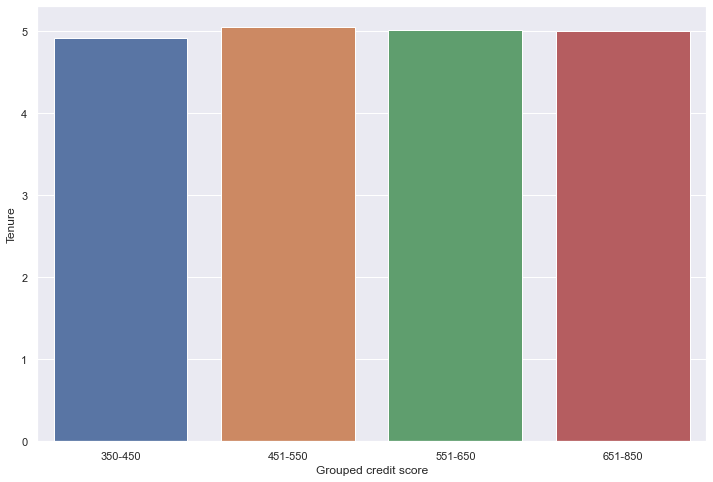

In [42]:
sns.set(rc = {'figure.figsize':(12,8)})
chart2 = sns.barplot(x='Grouped credit score', y='Tenure', data=table2)

In [43]:
df[['EstimatedSalary']].sort_values('EstimatedSalary')

,EstimatedSalary
2362,11.58
9647,90.07
9010,91.75
5548,96.27
4989,106.67
...,...
8926,199909.32
9096,199929.17
4417,199953.33
3580,199970.74


In [44]:
def group_salary(df):
    if df['EstimatedSalary'] <= 30000:
        df['Grouped Salary'] = '0-30000'
    elif df['EstimatedSalary'] > 30000 and df['EstimatedSalary'] <= 60000:
        df['Grouped Salary'] = '30000-60000'
    elif df['EstimatedSalary'] > 60000 and df['EstimatedSalary'] <= 100000:
        df['Grouped Salary'] = '60000-100000'
    elif df['EstimatedSalary'] > 100000 and df['EstimatedSalary'] <= 150000:
        df['Grouped Salary'] = '100000-150000'
    else:
        df['Grouped Salary'] = '150000-200000'
    return df

In [45]:
df = df.apply(group_salary, axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Count,Grouped credit score,Grouped Salary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45,NaN,551-650,100000-150000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45,NaN,551-650,100000-150000
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45,NaN,451-550,100000-150000
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45,NaN,651-850,60000-100000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45,NaN,651-850,60000-100000


In [55]:
table3 = df.groupby(['Grouped Salary']).agg({'Tenure':'mean'}).sort_values('Grouped Salary', ascending=True).reset_index()
table3

,Grouped Salary,Tenure
0,0-30000,4.983085
1,100000-150000,5.038356
2,150000-200000,5.021181
3,30000-60000,4.971679
4,60000-100000,5.022178


In [57]:
table3 = table3.reindex(index = [0, 3, 4, 1, 2])

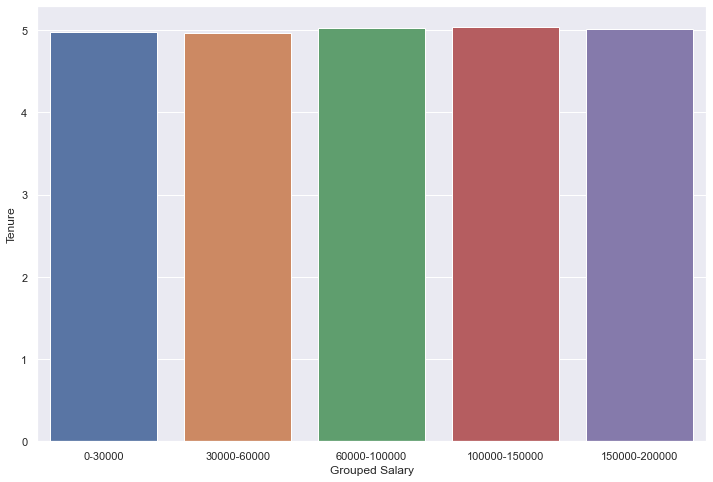

In [58]:
sns.set(rc = {'figure.figsize':(12,8)})
chart3 = sns.barplot(x='Grouped Salary', y='Tenure', data=table3)